# A04 - C-Inverso

- Nicolás Martínez Gutiérrez
- 751746
- 23/10/2025

In [11]:
from sklearn.datasets import fetch_lfw_people
faces = fetch_lfw_people(min_faces_per_person=60)
print(faces.target_names)
print(faces.images.shape)

['Ariel Sharon' 'Colin Powell' 'Donald Rumsfeld' 'George W Bush'
 'Gerhard Schroeder' 'Hugo Chavez' 'Junichiro Koizumi' 'Tony Blair']
(1348, 62, 47)


Este código carga un conjunto de datos de rostros famosos llamado Labeled Faces in the Wild (LFW) usando la función fetch_lfw_people de la librería scikit-learn (Pedregosa et al., 2011). La instrucción min_faces_per_person=60 hace que solo se incluyan personas que tengan al menos 60 fotografías disponibles, lo que mejora la calidad del entrenamiento. Luego, print(faces.target_names) muestra los nombres de las personas incluidas en el conjunto de datos, mientras que print(faces.images.shape) indica el tamaño de las imágenes y cuántas hay en total. En este caso, se cargaron 1,348 imágenes de 62 por 47 píxeles pertenecientes a 8 personas. En resumen, el código prepara un conjunto de imágenes faciales ya etiquetadas para ser usadas en un modelo de reconocimiento facial.

Referencia: Pedregosa, F., Varoquaux, G., Gramfort, A., Michel, V., Thirion, B., Grisel, O., ... & Duchesnay, É. (2011). Scikit-learn: Machine learning in Python. Journal of Machine Learning Research, 12, 2825–2830. https://scikit-learn.org/stable/modules/generated/sklearn.datasets.fetch_lfw_people.html

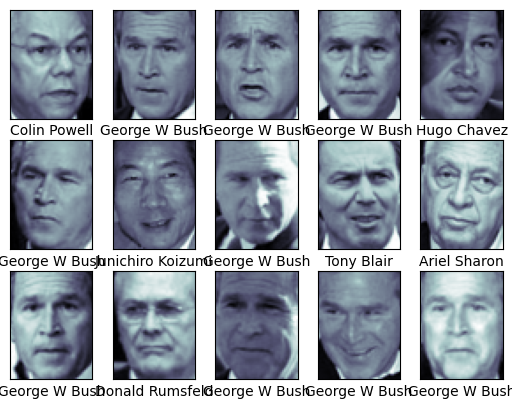

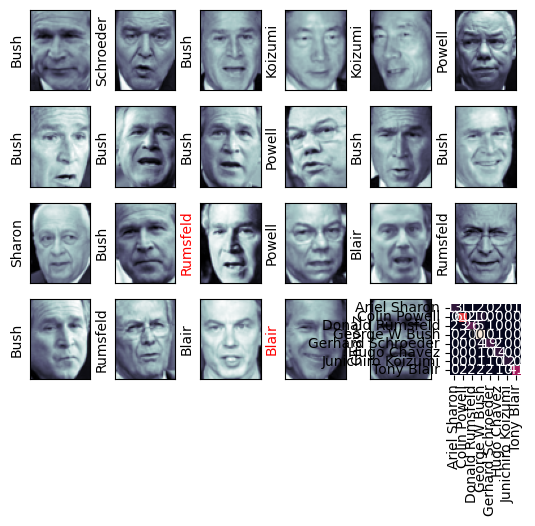

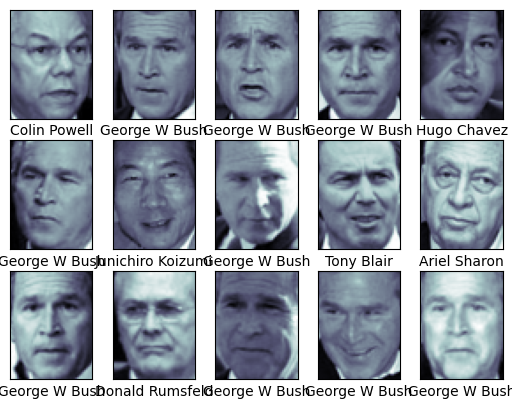

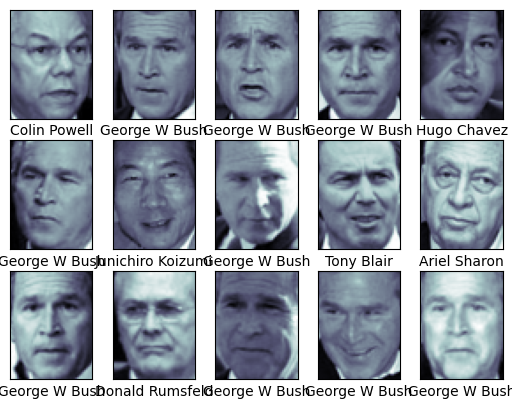

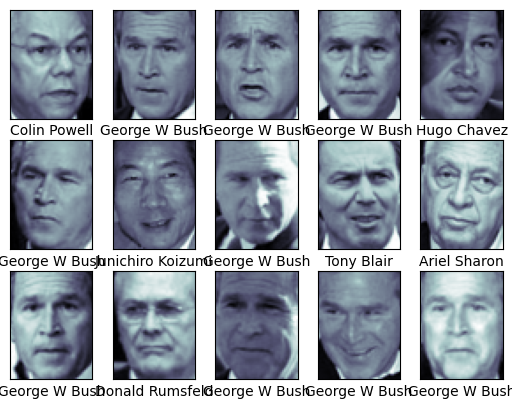

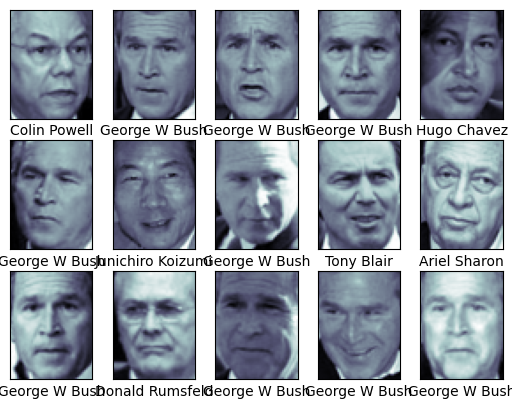

In [15]:
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots(3, 5)
for i, axi in enumerate(ax.flat):
    axi.imshow(faces.images[i], cmap='bone')
    axi.set(xticks=[], yticks=[],
            xlabel=faces.target_names[faces.target[i]])

plt.show()

Este código sirve para mostrar una cuadrícula de imágenes que pertenecen al conjunto de datos de rostros cargado previamente. Primero, con fig, ax = plt.subplots(3, 5) se crea una figura con 3 filas y 5 columnas, es decir, una cuadrícula con 15 espacios donde se colocarán las imágenes. Luego, el ciclo for recorre cada uno de esos espacios (o subgráficos) usando enumerate(ax.flat) para acceder tanto al índice como al objeto del gráfico. En cada iteración, se muestra una imagen del conjunto faces.images con la función imshow(), utilizando una escala de grises definida por cmap='bone' para resaltar los detalles de los rostros. Después, se eliminan los ejes con axi.set(xticks=[], yticks=[]) para que la visualización quede más limpia y se agrega debajo de cada imagen el nombre de la persona correspondiente, tomado de faces.target_names[faces.target [i]]. Finalmente, plt.show() muestra en pantalla la figura completa con las 15 imágenes organizadas y etiquetadas.

Referencia: 
Hunter, J. D. (2007). Matplotlib: A 2D Graphics Environment. Computing in Science & Engineering, 9(3), 90–95. https://matplotlib.org/stable/

In [16]:

from sklearn.svm import SVC
from sklearn.decomposition import PCA as RandomizedPCA
from sklearn.pipeline import make_pipeline

pca = RandomizedPCA(n_components=150, whiten=True, random_state=42)
svc = SVC(kernel='rbf', class_weight='balanced')
model = make_pipeline(pca, svc)

Este código construye un modelo de reconocimiento de rostros combinando dos técnicas: PCA y SVM. Primero, se importa SVC para crear un clasificador de máquinas de vectores de soporte, PCA (renombrado como RandomizedPCA) para reducir la cantidad de datos manteniendo la información más importante, y make_pipeline para unir ambos pasos en un solo flujo. Luego, se configura el PCA para conservar 150 componentes principales, lo que simplifica los datos de las imágenes y elimina ruido, mientras que el parámetro whiten=True estandariza las variables para mejorar el rendimiento del modelo. Después, se define un SVM con un kernel “rbf”, que permite que el clasificador aprenda límites no lineales, ideal cuando las clases no se separan de forma simple. El argumento class_weight='balanced' se usa para ajustar la importancia de cada clase si hay personas con más o menos fotos. Finalmente, make_pipeline(pca, svc) une ambos procesos en un solo modelo llamado model, de modo que los datos primero se reduzcan con PCA y luego se clasifiquen con el SVM automáticamente.

Referencia: 
Pedregosa, F., Varoquaux, G., Gramfort, A., Michel, V., Thirion, B., Grisel, O., … & Duchesnay, É. (2011). Scikit-learn: Machine Learning in Python. Journal of Machine Learning Research, 12, 2825–2830. https://scikit-learn.org/stable/

In [17]:
from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(faces.data, faces.target, random_state=42)

- Divide los datos en entrenamiento y prueba.
- random_state fija la aleatoriedad para reproducibilidad.

In [18]:
from sklearn.model_selection import GridSearchCV
param_grid = {'svc__C': [1, 5, 10, 50],
              'svc__gamma': [0.0001, 0.0005, 0.001, 0.005]}
grid = GridSearchCV(model, param_grid)

%time grid.fit(Xtrain, ytrain)
print(grid.best_params_)

CPU times: total: 3min 18s
Wall time: 59.6 s
{'svc__C': 5, 'svc__gamma': 0.001}


Este código busca los mejores valores para los parámetros del modelo SVM utilizando una técnica llamada búsqueda en cuadrícula (Grid Search). Primero, se importa GridSearchCV de scikit-learn, que permite probar distintas combinaciones de parámetros y evaluar cuál ofrece el mejor rendimiento. El diccionario param_grid define los valores que se van a probar: el parámetro C, que controla qué tanto penaliza el modelo los errores (entre 1 y 50), y gamma, que define la forma del límite de decisión del SVM (valores muy pequeños como 0.0001 o 0.001 hacen que el modelo sea más general). Luego, se crea el objeto grid con GridSearchCV(model, param_grid), indicando que se aplicará esta búsqueda al modelo que combina PCA y SVM. La línea grid.fit(Xtrain, ytrain) entrena el modelo probando todas las combinaciones posibles de parámetros y selecciona la que logra el mejor desempeño. Finalmente, print(grid.best_params_) muestra los valores óptimos encontrados: en este caso, C=5 y gamma=0.001. En resumen, este bloque automatiza el proceso de prueba y error para afinar el modelo y mejorar su precisión.

Referencia: 
Pedregosa, F., Varoquaux, G., Gramfort, A., Michel, V., Thirion, B., Grisel, O., … & Duchesnay, É. (2011). Scikit-learn: Machine Learning in Python. Journal of Machine Learning Research, 12, 2825–2830. https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html

In [19]:
model = grid.best_estimator_
yfit = model.predict(Xtest)

Recupera el mejor pipeline, PCA+SVC ya reajustados con los hiperparámetros ganadores, y predice en el conjunto de prueba.

In [20]:
fig, ax = plt.subplots(4, 6)
for i, axi in enumerate(ax.flat):
    axi.imshow(Xtest[i].reshape(62, 47), cmap='bone')
    axi.set(xticks=[], yticks=[])
    axi.set_ylabel(faces.target_names[yfit[i]].split()[-1],
                   color='black' if yfit[i] == ytest[i] else 'red')

Este fragmento del código muestra cómo visualizar los resultados de las predicciones del modelo de reconocimiento facial. Primero, con plt.subplots(4, 6) se crea una cuadrícula de 4 filas y 6 columnas, es decir, 24 espacios para colocar imágenes. Luego, el ciclo for recorre esos espacios uno por uno usando enumerate(ax.flat), que devuelve el índice y el gráfico donde se dibujará la imagen. Dentro del ciclo, axi.imshow(Xtest[i].reshape(62, 47), cmap='bone') muestra la imagen de prueba número i en escala de grises, devolviéndole su forma original de 62 por 47 píxeles. Después, se quitan los ejes (xticks y yticks) para una visualización más limpia. Finalmente, axi.set_ylabel() coloca el nombre predicho debajo de cada rostro: si el modelo acertó, el nombre se muestra en color negro; si se equivocó, aparece en rojo. En conjunto, este código genera una pequeña galería donde puedes ver qué predicciones fueron correctas y cuáles no, de forma visual e intuitiva.

Referencia: 
Hunter, J. D. (2007). Matplotlib: A 2D Graphics Environment. Computing in Science & Engineering, 9(3), 90–95. https://matplotlib.org/stable/

In [21]:

from sklearn.metrics import classification_report
print(classification_report(ytest, yfit,
                            target_names=faces.target_names))

                   precision    recall  f1-score   support

     Ariel Sharon       0.65      0.87      0.74        15
     Colin Powell       0.83      0.88      0.86        68
  Donald Rumsfeld       0.70      0.84      0.76        31
    George W Bush       0.97      0.80      0.88       126
Gerhard Schroeder       0.76      0.83      0.79        23
      Hugo Chavez       0.93      0.70      0.80        20
Junichiro Koizumi       0.86      1.00      0.92        12
       Tony Blair       0.82      0.98      0.89        42

         accuracy                           0.85       337
        macro avg       0.82      0.86      0.83       337
     weighted avg       0.86      0.85      0.85       337



Este código genera un reporte que muestra cómo de bien funcionó el modelo al reconocer rostros. Usa classification_report para comparar las predicciones (yfit) con las respuestas reales (ytest) y calcular métricas como precisión, recall y F1-score para cada persona. También incluye un resumen general con el accuracy total y los promedios de todas las clases. En pocas palabras, este bloque permite evaluar el rendimiento del modelo y ver en qué personas acierta más y en cuáles se equivoca.

Referencia: 
Pedregosa, F. et al. (2011). Scikit-learn: Machine Learning in Python. Journal of Machine Learning Research, 12, 2825–2830. https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html

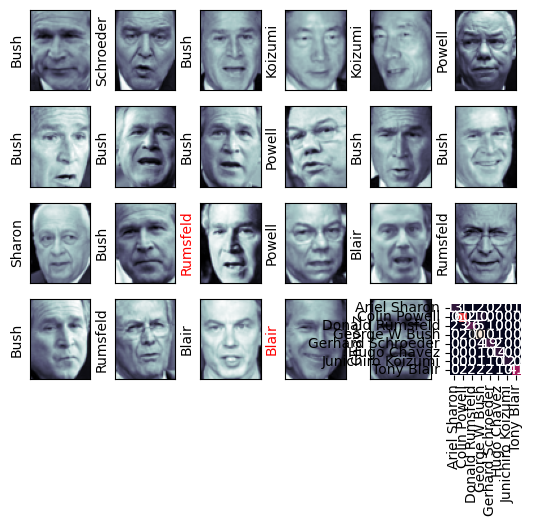

In [23]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(ytest, yfit)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=faces.target_names,
            yticklabels=faces.target_names)
plt.show()

Este código genera una matriz de confusión para analizar los errores del modelo y visualizarlos de manera clara. Primero, se importan las librerías necesarias: seaborn, usada para crear gráficos más atractivos, y confusion_matrix de scikit-learn, que calcula la matriz a partir de las etiquetas reales (ytest) y las predicciones del modelo (yfit). Luego, mat = confusion_matrix(ytest, yfit) crea una tabla donde las filas representan las clases reales y las columnas las clases predichas. Después, sns.heatmap() dibuja esta matriz como un mapa de calor: cada celda muestra cuántas veces el modelo clasificó una imagen en cierta categoría. Los argumentos annot=True muestran los números dentro de cada celda, fmt='d' indica que son enteros, y cbar=False elimina la barra de color lateral. Finalmente, xticklabels y yticklabels agregan los nombres de las personas a los ejes, haciendo más fácil identificar qué rostros se confundieron entre sí. En resumen, este bloque sirve para visualizar de forma intuitiva los aciertos y errores del modelo en cada clase.

Referencia: 
Pedregosa, F., Varoquaux, G., Gramfort, A., Michel, V., Thirion, B., Grisel, O., … & Duchesnay, É. (2011). Scikit-learn: Machine Learning in Python. Journal of Machine Learning Research, 12, 2825–2830. https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html Waskom, M. L. (2021). Seaborn: Statistical data visualization. Journal of Open Source Software, 6(60), 3021. https://seaborn.pydata.org/

In [24]:
from sklearn.datasets import load_digits
import matplotlib.pyplot as plt

digits = load_digits()
X, y = digits.data, digits.target

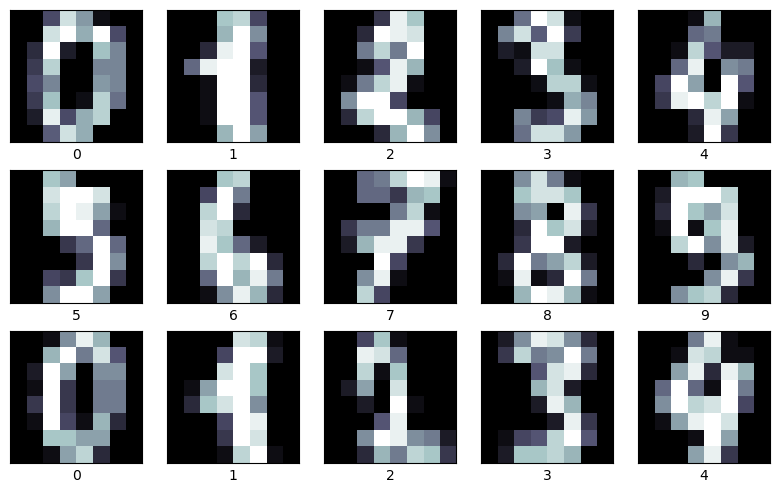

In [25]:
fig, ax = plt.subplots(3, 5, figsize=(8,5))
for i, axi in enumerate(ax.flat):
    axi.imshow(digits.images[i], cmap='bone')
    axi.set(xticks=[], yticks=[], xlabel=str(y[i]))
plt.tight_layout()
plt.show()

In [26]:
from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.25, random_state=42, stratify=y)

In [41]:
pca = RandomizedPCA(n_components=40, whiten=True, random_state=42)
svc = SVC(kernel='rbf', class_weight='balanced')
model = make_pipeline(pca, svc)

In [43]:
from sklearn.model_selection import GridSearchCV
param_grid = {'svc__C': [1, 5, 10, 50],
              'svc__gamma': [0.0001, 0.0005, 0.001, 0.005]}
grid = GridSearchCV(model, param_grid)

%time grid.fit(Xtrain, ytrain)
print(grid.best_params_)

CPU times: total: 1min 30s
Wall time: 27.6 s
{'svc__C': 5, 'svc__gamma': 0.005}


In [44]:
model = grid.best_estimator_
yfit = model.predict(Xtest)

In [48]:
fig, ax = plt.subplots(4, 6)
for i, axi in enumerate(ax.flat):
    axi.imshow(Xtest[i].reshape(8, 8), cmap='bone')
    axi.set(xticks=[], yticks=[])
    axi.set_ylabel(digits.target_names[yfit[i]],
                   color='black' if yfit[i] == ytest[i] else 'red')

In [50]:
from sklearn.metrics import classification_report
print(classification_report(ytest, yfit))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99        45
           1       0.96      0.98      0.97        46
           2       1.00      1.00      1.00        44
           3       0.98      1.00      0.99        46
           4       1.00      1.00      1.00        45
           5       0.98      0.98      0.98        46
           6       1.00      0.98      0.99        45
           7       0.98      1.00      0.99        45
           8       0.97      0.91      0.94        43
           9       0.98      0.98      0.98        45

    accuracy                           0.98       450
   macro avg       0.98      0.98      0.98       450
weighted avg       0.98      0.98      0.98       450



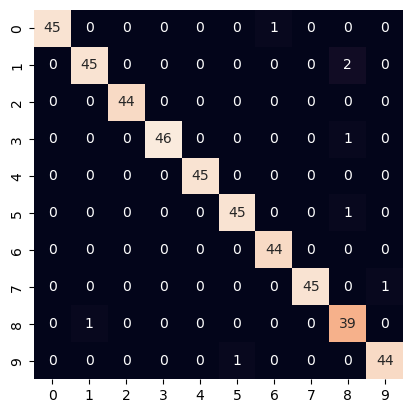

In [52]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(ytest, yfit)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=digits.target_names,
            yticklabels=digits.target_names)
plt.show()